# Spacy

## Part of Speech Tagging

In [1]:
import en_core_web_sm
import spacy
from scipy.spatial.distance import cosine
nlp = en_core_web_sm.load()

In [ ]:
import pandas as pd
rows = []
doc = nlp(u"Steve Jobs and Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    rows.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop))
    
data = pd.DataFrame(rows, columns=["text", "lemma", "part_of_speech", "tag", "dependency", "shape", "is_alphanumeric", "is_stopword"])
data.head()

### Named Entity Recognition

In [4]:
doc = nlp(u"Steve Jobs and Apple is looking at buying U.K. startup for $1 billion")
import en_core_web_sm, en_core_web_md
import spacy
from scipy.spatial.distance import cosine
nlp = en_core_web_sm.load()

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Steve Jobs 0 10 PERSON
Apple 15 20 ORG
U.K. 42 46 GPE
$1 billion 59 69 MONEY


In [3]:
# visualize this using displacy:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

# Word Embeddings (word2vec Introduction)

## Continuous Bag of Words (Use Context to Predict Target Word)
![alt text](images/word2vec_cbow.png "Logo Title Text 1")

## Softmax
![alt text](images/softmax.png "Logo Title Text 1")

## skipgram is an iterative approach

## Skipgram
![alt text](images/skipgram.png "Logo Title Text 1")

## Softmax
![alt text](images/wordembedding_cluster.png "Logo Title Text 1")

In [5]:
import en_core_web_sm
import spacy
from scipy.spatial.distance import cosine
nlp = en_core_web_sm.load()

In [6]:
tokens = nlp(u'dog cat Beijing sad depressed couch sofa canine China Chinese France Paris banana')

for token1 in tokens:
    for token2 in tokens:
        if token1 != token2:
            print(f" {token1} - {token2}: {1 - cosine(token1.vector, token2.vector)}")

 dog - cat: 0.44096532464027405
 dog - Beijing: 0.1896352618932724
 dog - sad: 0.2974436283111572
 dog - depressed: 0.09678884595632553
 dog - couch: 0.3066478967666626
 dog - sofa: 0.36296597123146057
 dog - canine: 0.29539573192596436
 dog - China: 0.12491319328546524
 dog - Chinese: 0.05871826782822609
 dog - France: 0.23890900611877441
 dog - Paris: 0.2118028998374939
 dog - banana: 0.3797188103199005
 cat - dog: 0.44096532464027405
 cat - Beijing: 0.37668392062187195
 cat - sad: 0.363819420337677
 cat - depressed: 0.09524044394493103
 cat - couch: 0.36932238936424255
 cat - sofa: 0.39886417984962463
 cat - canine: 0.2745530605316162
 cat - China: 0.36744892597198486
 cat - Chinese: 0.05915885046124458
 cat - France: 0.3288818597793579
 cat - Paris: 0.25500184297561646
 cat - banana: 0.2804490923881531
 Beijing - dog: 0.1896352618932724
 Beijing - cat: 0.37668392062187195
 Beijing - sad: 0.027374835684895515
 Beijing - depressed: 0.091560959815979
 Beijing - couch: 0.17345663905143

# Finding Most Similar Words (Using Our Old Methods)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# inspect the default settings for CountVectorizer
CountVectorizer()

In [ ]:
reviews = open("poor_amazon_toy_reviews.txt").readlines()

vectorizer = CountVectorizer(ngram_range=(1, 1), 
                             stop_words="english", 
                             max_features=500,token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
X = vectorizer.fit_transform(reviews)

data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
data.head()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# create similiarity matrix
similarity_matrix = pd.DataFrame(cosine_similarity(data.T.values), 
             columns=vectorizer.get_feature_names(),
                                 index=vectorizer.get_feature_names())

In [ ]:
# unstack matrix into table
similarity_table = similarity_matrix.rename_axis(None).rename_axis(None, axis=1).stack().reset_index()

In [ ]:
# rename columns
similarity_table.columns = ["word1", "word2", "similarity"]
similarity_table.shape

In [ ]:
similarity_table = similarity_table[similarity_table["similarity"] < 0.99]
similarity_table.shape

In [ ]:
similarity_table.sort_values(by="similarity", ascending=False).drop_duplicates(
    subset="similarity", keep="first").head(10)

In [ ]:
top_500_words = vectorizer.get_feature_names()

# Exercise: Similar Words Using Word Embeddings

In [ ]:
# load into spacy your top 500 words

tokens = nlp(f'{" ".join(top_500_words)}')

In [ ]:
from itertools import product
# create a list of similarity tuples

similarity_tuples = []

for token1, token2 in product(tokens, repeat=2):
    similarity_tuples.append((token1, token2, token1.similarity(token2)))

similarities = pd.DataFrame(similarity_tuples, columns=["word1","word2", "score"])


In [ ]:
# find similar words
similarities[similarities["score"] < 1].sort_values(
    by="score", ascending=False).drop_duplicates(
    subset="score", keep="first").head(5)

# Finding Most Similar Sentences

In [ ]:
# get vectors for each review
review_vectors = []
NUM_REVIEWS = 400
for review in reviews[:NUM_REVIEWS]:
    sentence = nlp(review)
    review_vectors.append(sentence.vector)

In [ ]:
vector_df =pd.DataFrame(review_vectors)
vector_df["text"] = reviews[:NUM_REVIEWS]


vector_df.set_index("text", inplace=True)

from sklearn.metrics.pairwise import cosine_similarity

similarities = pd.DataFrame(cosine_similarity(vector_df.values), columns=reviews[:NUM_REVIEWS], index=reviews[:NUM_REVIEWS])

top_similarities = similarities.unstack().reset_index()
top_similarities.columns = ["review1", "review2", "similarity"]
top_similarities = top_similarities.sort_values(by="similarity", ascending=False)
top_similarities = top_similarities[top_similarities["similarity"] < .9999].head(10)


for idx, row in top_similarities.iterrows():
    print(row["review1"])
    print(row["review2"])
    print("-" * 50)

# Distributions

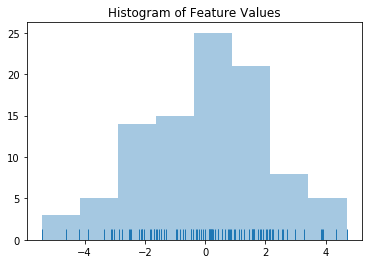

In [7]:
%matplotlib inline
import seaborn as sns
import numpy as np
import spacy

vector = nlp(u'banana').vector

ax = sns.distplot(vector, kde=False, rug=True)
t = ax.set_title('Histogram of Feature Values')

# most word2vec embeddings are normally distributed, sanity check


## Optimization Techniques

### Subsampling

What do we do with highly frequent words like `the` or `of`? We don't gain a ton of meaning from training on these words, and they become computationally expensive since they appear so frequently:

![alt text](images/subsampling.png "http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/")
In the image above, $z(w_i)$ is the frequency of that particular word divided by the total number of words in the entire corpus. For instance, if a corpus of text has 50 words, and the word `dog` appears 3 times, $z(w_{dog}) = 0.06$.

In [ ]:
import numpy as np
# write subsampling function
def subsample(z):
    return ((z * 1000) ** 0.5 + 1) * (0.001 / z)

# plot this function:
import matplotlib.pyplot as plt

Z = list(np.linspace(0,1,100))
probability_of_keeping = list(map( lambda z: subsample(z), Z))

plt.scatter(Z, probability_of_keeping)
plt.xlabel("Frequency word appears in corpus")
plt.ylabel("Probability of keeping")
plt.show()

## Limitations of Word Embeddings

#### How to handle **Out Of Vocabulary (OOV)** words?
Although **word2vec** and **FastText** include a significant vocabulary size, there will inevitably be words that are not included. For instance, if you are analyzing text conversations using word embeddings pretrained on Wikipedia text (which typically has more formal vocabulary than everyday language), how will you account for the following words?

- DM
- ROFLMAO
- bae
- 😃
- #10YearChallenge
- wut

#### Potential solution: use word embeddings if they are available, and otherwise initialize the weights to random.

```python
import numpy as np
def vectorize_word(input_word: str, D=50):
    """
    D: an integer that represents the length (dimensionality of the word embeddings)
    word_embeddings: A dictionary object with the string word as the key, and the embedding vector of 
    length D as the values.
    For instance, word_embeddings["cat"] will return [2.3, 4.5, 6.1, -2.2, ...]
    """
    if input_word in word_embeddings.keys():
        return word_embeddings[input_word]
    else:
        return np.random.rand(D)
```

##### Should we update the word embedding matrices during the model training step?
- Ideally, you'd only want to be able to update the specific weights that were randomly initialized (since the rest of the weights are by definition pre-trained and are already pretty good). However, most deep learning libraries do not allow you to easily select which specific weight elements to apply backpropagation to- you either update all weights or you update none. In practice, most data scientists will "freeze" the word embedding layer:

In Keras:
```python
word_embedding_layer.trainable = False # by default, trainable is set to true in Keras
```
In Tensorflow:
```python
import tensorflow as tf
N = 300 # number of words
D = 50 # of dimensions in embeddings
initial_word_embeddings = [0, 1, 2, 3, 4, 5, 6, 7]
tensor = tf.constant(initial_word_embeddings, shape=[N, D])
```

- Ambiguity around **Domain-specific words**: using a generic pre-trained word embedding will not capture the semantic meaning of the word **sack** when it is used in the context of American football:
![sack](images/football-bag-sack-diff.png)

# Gensim

In [8]:
# from https://radimrehurek.com/gensim/models/word2vec.html
from gensim.test.utils import common_texts, get_tmpfile # get_tmpfile: save a model for us
from gensim.models import Word2Vec

path = get_tmpfile("word2vec.model")
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [9]:
from gensim.models import Word2Vec
# define training data
# pass in a list of lists
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence'],
            ["first", "and", "second", "sentence"]] 
# train model
# you can also specify an alpha, which is a hyperparameter learning rate
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary1
words = list(model.wv.vocab)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [10]:
model.wv.get_vector("second") # vector that represented the word "second"

array([ 2.5092266e-05,  1.9522295e-03,  1.4109060e-03, -1.0363804e-03,
        9.1018976e-04, -1.6978879e-03, -1.7306680e-03,  4.7595566e-03,
        5.9507601e-04, -2.0301137e-03, -3.1543707e-03, -1.2550931e-04,
        4.1557365e-04,  7.8584079e-04,  2.2424064e-03, -4.2699967e-03,
        2.2679116e-04, -2.6429801e-03,  3.4011710e-03,  3.7786164e-03,
        1.5968040e-03, -2.1087071e-03, -2.4564702e-03,  4.7298153e-03,
       -6.8761983e-05,  4.8470413e-03,  3.6488401e-03, -3.8178321e-03,
       -3.4434139e-03, -1.7051263e-04,  3.6443173e-04, -1.3256480e-03,
        1.1629105e-04, -3.4973472e-03,  3.8749522e-03, -1.8761534e-03,
        3.3677698e-03, -3.9364309e-03, -3.6525205e-03,  7.3286262e-04,
       -4.1624205e-03,  6.8051839e-04,  2.4304332e-03, -3.9490922e-03,
        3.9610662e-03, -2.8323629e-03, -1.4331616e-03, -4.4142830e-04,
       -3.9973161e-03, -4.0987930e-03,  2.9062559e-03, -4.2559486e-03,
       -3.8320315e-03, -4.6142866e-03,  1.3906345e-03, -6.3733663e-04,
      

## Training Your Own Word2Vec Embeddings Using Gensim
training to predict context word bases on targets

In [11]:
reviews = open("good_amazon_toy_reviews.txt").readlines() + open("poor_amazon_toy_reviews.txt").readlines()

In [12]:
from nltk import word_tokenize

In [13]:
docs = [word_tokenize(review) for review in reviews] # get a list of lists

In [14]:
model = Word2Vec(docs, min_count=5) # token appears at least 5 times

In [15]:
model.wv.most_similar("amazon") # getting similar words for amazon

[('Amazon', 0.8654698729515076),
 ('sale', 0.7671324014663696),
 ('site', 0.660471498966217),
 ('Amazon.com', 0.6390148401260376),
 ('Japan', 0.6285412311553955),
 ('eBay', 0.628023624420166),
 ('Ebay', 0.6125444173812866),
 ('ebay', 0.6081639528274536),
 ('Walmart', 0.6078121066093445),
 ('Target', 0.5998607277870178)]

## Using GoogleNews word2vec vectors

In [16]:
# load in the entire Google News word embedding vectors
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

# word analogies
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [ ]:
# get the most similar words for a target word
model.most_similar("cappucino")

# FastText

### When to use?

- traditionally, each individual word is trained onto a new word embedding
- in many languages (including English), many words are morphologically derivative from each other. 
- use case when your corpus contains high-value, morphologically diverse, rare words (`photosynthesis`, `transcendentalism`)
- may also be effective when your text contains lots of misspellings or abbreviations (ie. SMS, digital conversations)

In [ ]:
import fasttext

model = fasttext.train_unsupervised('good_amazon_toy_reviews.txt', model='skipgram', lr=0.05, dim=100, ws=5, epoch=5)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(model["adore"].reshape(1,-1), model["love"].reshape(1,-1))
# cosine similarity scores is between 0 and 1 only when based on word counts, tf-idf etc.
# if based on negative values, need to normalize to get similarity score in that range

### FastText Hyperparameters (From [Tutorial Notebook](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/FastText_Tutorial.ipynb))
- **model**: Training architecture. Allowed values: `cbow`, `skipgram` (Default `cbow`)
- **size**: Size of embeddings to be learnt (Default 100)
- **alpha**: Initial learning rate (Default 0.025)
- **window**: Context window size (Default 5)
- **min_count**: Ignore words with number of occurrences below this (Default 5)
- **loss**: Training objective. Allowed values: `ns`, `hs`, `softmax` (Default `ns`)
- **sample**: Threshold for downsampling higher-frequency words (Default 0.001)
- **negative**: Number of negative words to sample, for `ns` (Default 5)
- **iter**: Number of epochs (Default 5)
- **sorted_vocab**: Sort vocab by descending frequency (Default 1)
- **threads**: Number of threads to use (Default 12)

Hyperparameters unique to `fasttext`:
- **min_n**: min length of char ngrams (Default 3)
- **max_n**: max length of char ngrams (Default 6)
- **bucket**: number of buckets used for hashing ngrams (Default 2000000)

## Gensim Implementation of FastText

In [17]:
from gensim.models import FastText

In [18]:
import pandas as pd
from nltk import word_tokenize
text = list(pd.read_csv("bbc-text.csv")["text"].values)

new_text = [word_tokenize(story) for story in text]

In [19]:
model = FastText(size=200, window=4, min_count=2)  # change the size of the windows
model.build_vocab(sentences=new_text)
model.train(sentences=new_text, total_examples=len(new_text), epochs=10)

In [20]:
# get corpus total count
model.corpus_count

2225

In [21]:
# get word vector for dog
model.wv["dog"]

array([-0.35548925, -0.2392853 ,  0.1783668 ,  0.2178757 , -0.34836483,
       -0.13850698, -0.04159029, -0.11388176,  0.33893082,  0.07921807,
       -0.45206115,  0.2871333 ,  0.36816663, -0.7687537 , -0.08989591,
        0.16278489,  0.11419601, -0.12533134,  0.43718037, -0.5201533 ,
        0.25022006, -0.42382377,  0.42026442, -0.5679746 ,  0.0815757 ,
        0.5062104 , -0.10711527,  0.24420968, -0.439406  ,  0.60453254,
       -0.20767434,  0.618615  , -0.56026024,  0.18472664,  0.22696745,
       -0.09939901, -0.63494384,  0.12793192, -0.09048668, -0.06641864,
        1.3101934 ,  0.06419657, -0.17219837, -0.24614467,  0.21924664,
       -0.8551644 ,  0.28719473,  0.12382978,  0.18622756,  0.34361595,
        0.00479034, -0.4991639 ,  0.3079553 , -0.29209128, -0.63230735,
        0.4234859 , -0.15701935, -0.09134828,  0.71122354, -0.16012025,
       -0.13554446, -0.50125176, -0.36299777, -0.2540749 ,  0.09812494,
        0.43265495,  0.27067137,  0.61005896, -0.23883493,  0.33

In [22]:
# get length of word embeddings
len(model["king"])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


200

In [23]:
model.most_similar("france")
model.most_similar("dog")
model.most_similar("transc")

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('transmit', 0.8640565872192383),
 ('translate', 0.8462340831756592),
 ('high-tech', 0.8430594205856323),
 ('tata', 0.8419097661972046),
 ('tech', 0.8399066925048828),
 ('data', 0.8395676612854004),
 ('connectivity', 0.8377481698989868),
 ('storage', 0.8365424275398254),
 ('transform', 0.8280481696128845),
 ('metadata', 0.8267114162445068)]

## Doc2Vec

Add in document matrix (D), initially just random values, but added in classification work flow, so part of the loss function. not tied to any single word or context word

### Distributed Memory Version of Paragraph Vector (PV-DM)
![](images/doc2vec.png)

### Distributed Bag of Words of Paragraph Vector (PV-DBOW)
![](images/doc2vec2.png)
[A Gentle Introduction to Doc2Vec](https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)

In [24]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews)]
model = Doc2Vec(documents, vector_size=50, window=4, min_count=2, workers=4)

In [25]:
doc1_vector = model.infer_vector(["The", "toy", "was", "broken", "quickly"]).reshape(1, -1)
doc2_vector = model.infer_vector(["It", "broke", "fast"]).reshape(1, -1)
doc3_vector = model.infer_vector(["I ate lunch late"]).reshape(1,-1)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
cosine_similarity(doc1_vector, doc2_vector)

array([[1.0842022e-19]], dtype=float32)

In [28]:
cosine_similarity(doc1_vector, doc3_vector)

array([[-1.0842022e-19]], dtype=float32)

In [29]:
cosine_similarity(doc2_vector, doc3_vector)

array([[0.]], dtype=float32)